# Required Dependencies

In [2]:
import numpy as np
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import itertools

import networkx as nx
import matplotlib.pyplot as plt


# Problem 1

We consider a small Markov Random Field describing a distribution of 5 binary (-1, 1 values)variables: A1, A2, A3, A4, A5. The relations of conditional independence are as follows: A1 is connected with A2 and A3. A2 is conected with A4 and A5 , A3 is connected to A4, A4 is connected with A5

The local functions coresponding to the clique is as follows:


phi(Ai1, Ai2, ..., Ain) = e ** {i1Ai1 + i2Ai2 + ... + inAin}

## Sub Problem a

using pgmpy, visualize the graph of the Markov Network. And determine the clique of the model

**Solution**

Building and visualizing the Markov Network

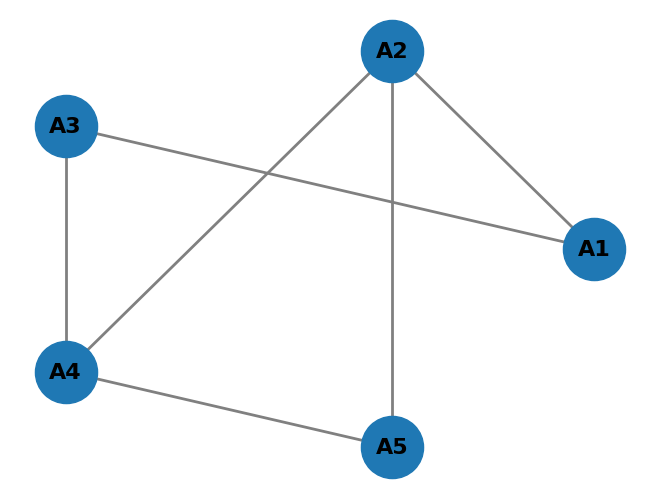

In [4]:
model = MarkovNetwork([("A1", "A2"), ("A1", "A3"), ("A2", "A4"), ("A2", "A5"), ("A3", "A4"), ("A4", "A5")])


pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True,
        node_size=2000, font_size=16, font_weight='bold',
        edge_color='gray', width=2)



Finding all cliques in code

In [5]:
cliques = list(nx.find_cliques(model))

for i, clique in enumerate(cliques, 1):
    print(f"Clique {i}: {clique}")


Clique 1: ['A2', 'A4', 'A5']
Clique 2: ['A2', 'A1']
Clique 3: ['A3', 'A4']
Clique 4: ['A3', 'A1']


## Sub Problem b
Determine the joint distribution of the five variables and infer the states of maximum probabilities for them

**Solution**

defining the factors

In [20]:
values = [-1, 1]

factor_a2_a4_a5 = DiscreteFactor(
    ["A2", "A4", "A5"],
    cardinality=[2, 2, 2],
    values=[np.exp(2*a2+4*a4+5*a5) for a2 in values for a4 in values for a5 in values]
)

factor_a1_a2 = DiscreteFactor(
    ["A1", "A2"],
    cardinality=[2, 2],
    values=[np.exp(1*a1+2*a2) for a1 in values for a2 in values]
)

factor_a1_a3 = DiscreteFactor(
    ["A1", "A3"],
    cardinality=[2, 2],
    values=[np.exp(1*a1+3*a3) for a1 in values for a3 in values]
)

factor_a3_a4 = DiscreteFactor(
    ["A3", "A4"],
    cardinality=[2, 2],
    values=[np.exp(3*a3+4*a4) for a3 in values for a4 in values]
)

product = factor_a2_a4_a5 * factor_a1_a2 * factor_a1_a3 * factor_a3_a4
product.normalize()

print(product)

+-------+-------+-------+-------+-------+-----------------------+
| A2    | A5    | A1    | A4    | A3    |   phi(A2,A5,A1,A4,A3) |
+=======+=======+=======+=======+=======+=======================+
| A2(0) | A5(0) | A1(0) | A4(0) | A3(0) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A2(0) | A5(0) | A1(0) | A4(0) | A3(1) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A2(0) | A5(0) | A1(0) | A4(1) | A3(0) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A2(0) | A5(0) | A1(0) | A4(1) | A3(1) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A2(0) | A5(0) | A1(1) | A4(0) | A3(0) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A2(0) | A5(0) | A1(1) | A4(0) | A3(1) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A2(0) | 

**Adding the factors**

In [21]:
model.add_factors(factor_a2_a4_a5, factor_a1_a2, factor_a1_a3, factor_a3_a4)
model.get_factors()

[<DiscreteFactor representing phi(A1:2, A2:2) at 0x7f5045228980>,
 <DiscreteFactor representing phi(A1:2, A3:2) at 0x7f5045356e90>,
 <DiscreteFactor representing phi(A2:2, A4:2) at 0x7f5045356350>,
 <DiscreteFactor representing phi(A2:2, A5:2) at 0x7f5045227a80>,
 <DiscreteFactor representing phi(A3:2, A4:2) at 0x7f5045227bb0>,
 <DiscreteFactor representing phi(A4:2, A5:2) at 0x7f50452eb650>,
 <DiscreteFactor representing phi(A1:2, A2:2) at 0x7f5045228980>,
 <DiscreteFactor representing phi(A1:2, A3:2) at 0x7f5045356e90>,
 <DiscreteFactor representing phi(A2:2, A4:2) at 0x7f5045356350>,
 <DiscreteFactor representing phi(A2:2, A5:2) at 0x7f5045227a80>,
 <DiscreteFactor representing phi(A3:2, A4:2) at 0x7f5045227bb0>,
 <DiscreteFactor representing phi(A4:2, A5:2) at 0x7f50452eb650>,
 <DiscreteFactor representing phi(A1:2, A2:2) at 0x7f50451fee00>,
 <DiscreteFactor representing phi(A1:2, A3:2) at 0x7f50451fdbf0>,
 <DiscreteFactor representing phi(A2:2, A4:2) at 0x7f504520ee50>,
 <Discrete

**Inference computation: using Belief propagation**

In [22]:
bp_infer = BeliefPropagation(model)

marginals = bp_infer.map_query(variables=["A1", "A2", "A3", "A4", "A5"])

print(marginals)

{'A1': 1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': 1}


**Calculate unnormalized joint probability for map assignment**

In [24]:
map_prob = 1.0

for factor in [factor_a2_a4_a5, factor_a1_a2, factor_a1_a3, factor_a3_a4]:

    state = tuple([marginals[var] for var in factor.variables])
    map_prob *= factor.get_value(**{var: marginals[var] for var in factor.variables})


print(f"Unnormalized Joint Probability: {map_prob:.6e}")

Unnormalized Joint Probability: 7.200490e+10


# Problem 2


## Solution a

**creating a random image**

In [3]:
np.random.seed(42)

In [7]:
def create_image():
    image = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            image[i, j] = np.random.choice([0, 1])

    return image

original = create_image()
print(original)

[[1. 1. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]]


**making the original image noisy**

In [8]:
def add_noise(image, noise_percentage=0.1):
    noisy_image = image.copy()
    flattened_image = noisy_image.flatten()
    num_pixels = len(flattened_image)
    num_noise_pixels = int(noise_percentage * num_pixels)

    noise_indices = np.random.choice(num_pixels, num_noise_pixels, replace=False)

    for idx in noise_indices:
        flattened_image[idx] = 1 - flattened_image[idx]

    return flattened_image.reshape(image.shape)

noisy = add_noise(original)
print(noisy)


[[1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


**Making the Markov Network**

In [13]:
def create_markov_network(image_shape, lambda_reg=2.0):

    row, cols = image_shape
    model = MarkovNetwork()

    # adding the nodes
    nodes = []
    for i in range(row):
        for j in range(cols):
            node_name = f"pixel_{i}_{j}"
            nodes.append(node_name)

    model.add_nodes_from(nodes)

    #adding edges between nodes
    edges = []
    for i in range(row):
        for j in range(cols):
            current_node = f"pixel_{i}_{j}"

            # Right neighbor
            if j < cols - 1:
                right_node = f"pixel_{i}_{j+1}"
                edges.append((current_node, right_node))

            # Bottom neighbor
            if i < row - 1:
                bottom_node = f"pixel_{i+1}_{j}"
                edges.append((current_node, bottom_node))

    model.add_edges_from(edges)

    return model, nodes


markov_network, nodes = create_markov_network((5, 5))

print(f"Markov network created with {len(markov_network.nodes())} Nodes and {len(markov_network.edges())} Edges")

Markov network created with 25 Nodes and 40 Edges


**Adding factors to the network**

In [18]:
def add_factors(model, noisy_image, lambda_reg=2.0):
    """
    Adding unary and pairwise factors to the markov model

    unary: lambda * (x_l - y_l)^2
    pairwise = (x_i - x_j)^2

    """

    row, cols = noisy_image.shape

    # adding unary factors

    for i in range(row):
        for j in range(cols):
            node_name = f"pixel_{i}_{j}"

            observed_value = noisy_image[i, j]

            # creating a factor to binary variables 0 and 1

            # if x = y: energy=0
            # if x != y then energy is lambda_reg

            factor_values = np.zeros(2)
            for state in [0, 1]:
                if state == observed_value:
                    energy = 0
                else:
                    energy = lambda_reg

                factor_values[state] = np.exp(-energy)

            unary_factor = DiscreteFactor([node_name], [2], factor_values)
            model.add_factors(unary_factor)
    # adding pairwise factors

    for edge in model.edges():
        node1, node2 = edge


        factor_values = np.ones((2, 2))

        for state1 in [0, 1]:
            for state2 in [0, 1]:
                if state1==state2:
                    energy = 0
                else:
                    energy = 1

                factor_values[state1, state2] = np.exp(-energy)

        pairwise_factor = DiscreteFactor([node1, node2], [2, 2], factor_values)
        model.add_factors(pairwise_factor)

    return model


markov_model_ful = add_factors(markov_network, noisy)

print(f"Added factors to the model with {len(markov_model_ful.nodes())} Nodes and {len(markov_model_ful.edges())} Edges")
print(markov_model_ful.get_factors())

print(markov_model_ful.check_model())



Added factors to the model with 25 Nodes and 40 Edges
[<DiscreteFactor representing phi(pixel_0_0:2) at 0x7f5210002a50>, <DiscreteFactor representing phi(pixel_0_1:2) at 0x7f5207c90910>, <DiscreteFactor representing phi(pixel_0_2:2) at 0x7f5207c90cd0>, <DiscreteFactor representing phi(pixel_0_3:2) at 0x7f520ffea8b0>, <DiscreteFactor representing phi(pixel_0_4:2) at 0x7f520ffea650>, <DiscreteFactor representing phi(pixel_1_0:2) at 0x7f52100655b0>, <DiscreteFactor representing phi(pixel_1_1:2) at 0x7f521017fce0>, <DiscreteFactor representing phi(pixel_1_2:2) at 0x7f521017f020>, <DiscreteFactor representing phi(pixel_1_3:2) at 0x7f5207c89950>, <DiscreteFactor representing phi(pixel_1_4:2) at 0x7f5207c89e50>, <DiscreteFactor representing phi(pixel_2_0:2) at 0x7f5207cfa210>, <DiscreteFactor representing phi(pixel_2_1:2) at 0x7f5207cfa4e0>, <DiscreteFactor representing phi(pixel_2_2:2) at 0x7f520ff86a50>, <DiscreteFactor representing phi(pixel_2_3:2) at 0x7f520ff86eb0>, <DiscreteFactor repre

## solution b

**MAP estimation from the noisy image**

In [19]:
def denoise_image(model, node_names, image_shape):

    bp = BeliefPropagation(model)

    map_result = bp.map_query(variables=node_names)

    rows, cols = image_shape
    denoised_image = np.zeros(image_shape)

    for i in range(rows):
        for j in range(cols):
            node_name = f"pixel_{i}_{j}"
            denoised_image[i, j] = map_result[node_name]

    return denoised_image, bp

result_denoise, bp_inference = denoise_image(markov_model_ful, nodes, (5, 5))

print(result_denoise)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


**Computing the accuracy**

In [20]:
def calculate_accuracy(original, denoised):
    return np.mean(original == denoised) * 100


original_accuracy = calculate_accuracy(original, noisy)
bp_accuracy = calculate_accuracy(original_accuracy, result_denoise)

**Computing the energy**

In [22]:
def calculate_energy(image, noisy_image, lambda_reg=2.0):
    row, cols = image.shape
    energy = 0


    for i in range(row):
        for j in range(cols):
            if image[i, j] != noisy_image[i, j]:
                energy += lambda_reg

    for i in range(row):
        for j in range(cols-1):
            if image[i, j] != image[i, j+1]:
                energy += lambda_reg

    for i in range(row-1):
        for j in range(cols):
            if image[i, j] != image[i+1, j]:
                energy += lambda_reg

    return energy


noise_energy = calculate_energy(noisy, noisy, lambda_reg=2.0)
bp_energy = calculate_energy(result_denoise, noisy, lambda_reg=2.0)

**Results**

In [23]:
print(f"Original Accuracy: {original_accuracy:.2f}%")
print(f"BP Accuracy: {bp_accuracy:.2f}%")
print(f"Noise Energy: {noise_energy:.2f}")
print(f"BP Energy: {bp_energy:.2f}")

Original Accuracy: 92.00%
BP Accuracy: 0.00%
Noise Energy: 30.00
BP Energy: 14.00
